In [252]:
!jt -t chesterish

In [44]:
cd .. 

/Users/harshchobisa/Desktop/spring_quarter/capstone


In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('cifar10_sorted_fulldata.pkl', 'rb') as f:
    forget = pickle.load(f)

In [85]:
from numpy import load

large_full_craig = load('craig_results/craig_cifar10_larger.npz')
medium_full_craig = load('craig_results/craig_cifar10_five.npz')
small_full_craig = load('craig_results/craig_cifar10_smaller.npz')
pruned_full_craig = load('craig_results/craig_grasp_cifar10_95_0.1.npz')
# full_craig995 = load("LATEST_ULTRA_PRUNED_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")
full_craig985 = load("craig_grasp_results/985_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")
full_craig98 = load("craig_grasp_results/98_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")
full_craig95 = load("craig_grasp_results/95_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")
full_craig90 = load("craig_grasp_results/90_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")
full_craig85 = load("craig_grasp_results/85_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")
full_craig925 = load("craig_grasp_results/925_grasp_cifar10_sgd_moment_0.9_resnet20_0.1_grd_w_warm_mile_start_0_lag_1_subset.npz")


In [86]:
large_craig = large_full_craig['subset'][0]
medium_craig = medium_full_craig['subset'][0]
small_craig = small_full_craig['subset'][0]
pruned_craig = pruned_full_craig['subset'][0]
large_pruned_craig = large_pruned_full_craig['subset'][0]

craig985 = full_craig985['subset'][0]
craig98 = full_craig98['subset'][0]
craig95 = full_craig95['subset'][0]
craig90 = full_craig90['subset'][0]
craig85 = full_craig85['subset'][0]

craig925 = full_craig925['subset'][0]






In [8]:
large_craig.shape

(200, 10000)

In [9]:
forget

{'indices': array([10538, 32125, 40142, ..., 32791, 18470, 47111]),
 'forgetting counts': array([ 0,  0,  0, ..., 34, 34, 34])}

In [10]:
forget_counts_dict = {}
for i, val in enumerate(forget['indices']):
    forget_counts_dict[val] = forget['forgetting counts'][i]

In [11]:
forget_counts_dict

{10538: 0,
 32125: 0,
 40142: 0,
 21732: 0,
 20762: 0,
 40943: 0,
 46345: 0,
 47256: 0,
 28115: 0,
 16669: 0,
 22451: 0,
 5932: 0,
 16671: 0,
 30585: 0,
 9717: 0,
 35491: 0,
 6446: 0,
 39385: 0,
 33606: 0,
 28234: 0,
 49759: 0,
 39314: 0,
 17091: 0,
 32958: 0,
 11407: 0,
 12803: 0,
 20760: 0,
 14116: 0,
 39437: 0,
 19384: 0,
 10462: 0,
 11015: 0,
 17865: 0,
 2621: 0,
 14577: 0,
 126: 0,
 47137: 0,
 28635: 0,
 32736: 0,
 42944: 0,
 25590: 0,
 40777: 0,
 39387: 0,
 10148: 0,
 27661: 0,
 5422: 0,
 31949: 0,
 35402: 0,
 46891: 0,
 35726: 0,
 25306: 0,
 7867: 0,
 30472: 0,
 512: 0,
 40172: 0,
 33484: 0,
 13358: 0,
 914: 0,
 779: 0,
 44707: 0,
 38638: 0,
 11388: 0,
 16984: 0,
 11883: 0,
 10713: 0,
 48900: 0,
 15490: 0,
 36982: 0,
 34766: 0,
 24920: 0,
 39668: 0,
 18401: 0,
 28005: 0,
 1311: 0,
 4923: 0,
 41786: 0,
 40181: 0,
 34864: 0,
 38662: 0,
 47299: 0,
 45922: 0,
 48227: 0,
 49285: 0,
 1261: 0,
 14648: 0,
 9353: 0,
 18076: 0,
 13244: 0,
 39202: 0,
 37289: 0,
 36143: 0,
 21636: 0,
 36194

In [12]:
# not_selected_sum = np.sum(full_craig['not_selected'][0])
# print(full_craig['not_selected'].shape)

not_selected_sum = []

for i in full_craig['not_selected'][0]:
    not_selected_sum.append(forget_counts_dict[int(i)])
    
np.mean(not_selected_sum)
# np.std(not_selected_sum)

NameError: name 'full_craig' is not defined

In [49]:
def get_all_sums(craig):
    all_sums = []
    for i in range(200):
        sums = 0
        for j in range(craig.shape[1]):
            sums += forget_counts_dict[int(craig[i][j])]
        all_sums.append(sums)
    return(all_sums)

In [51]:
all_sums_small = get_all_sums(small_craig)
all_sums_medium = get_all_sums(medium_craig)
all_sums_large = get_all_sums(large_craig)

all_sums_985 = get_all_sums(craig985)
all_sums_98 = get_all_sums(craig98)
all_sums_95 = get_all_sums(craig95)
all_sums_90 = get_all_sums(craig90)
all_sums_85 = get_all_sums(craig85) 

In [87]:
all_sums_925 = get_all_sums(craig925) 

In [38]:
all_sums_pruned_large = []
for i in range(200):
    sums = 0
    for j in range(large_pruned_craig.shape[1]):
        sums += forget_counts_dict[int(large_pruned_craig[i][j])]
    all_sums_pruned_large.append(sums)

In [39]:
average_forgettability_large = np.array(all_sums_large) / large_craig.shape[1]
average_forgettability_medium = np.array(all_sums_medium) / medium_craig.shape[1]
average_forgettability_small = np.array(all_sums_small) / small_craig.shape[1]
# average_forgettability_pruned = np.array(all_sums_pruned) / pruned_craig.shape[1]
# average_forgettability_pruned_large = np.array(all_sums_pruned_large) / large_pruned_craig.shape[1]

In [88]:
average_forgettability_985 = np.array(all_sums_985) / craig985.shape[1]
average_forgettability_98 = np.array(all_sums_98) / craig98.shape[1]
average_forgettability_95 = np.array(all_sums_95) / craig95.shape[1]
average_forgettability_90 = np.array(all_sums_90) / craig90.shape[1]
average_forgettability_85 = np.array(all_sums_85) / craig85.shape[1]

average_forgettability_925 = np.array(all_sums_925) / craig925.shape[1]




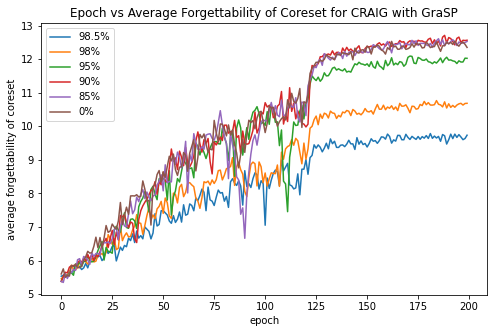

In [92]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)


plt.plot(range(200), average_forgettability_985, label='98.5%')
plt.plot(range(200), average_forgettability_98, label='98%')
plt.plot(range(200), average_forgettability_95, label='95%')
plt.plot(range(200), average_forgettability_90, label='90%')
plt.plot(range(200), average_forgettability_85, label='85%')
plt.plot(range(200), average_forgettability_medium, label='0%')






plt.legend()
plt.xlabel("epoch")
plt.ylabel("average forgettability of coreset")
plt.title("Epoch vs Average Forgettability of Coreset for CRAIG with GraSP")
plt.savefig("two.jpeg")


plt.show()

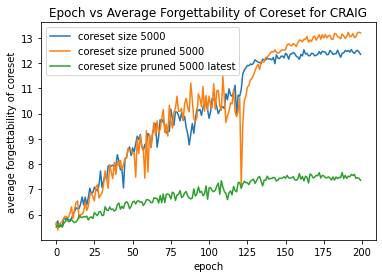

In [40]:
import matplotlib.pyplot as plt

# plt.plot(range(200), average_forgettability_small, label='coreset size 2500')
plt.plot(range(200), average_forgettability_medium, label='coreset size 5000')
# plt.plot(range(200), average_forgettability_large, label='coreset size 10000')
plt.plot(range(200), average_forgettability_pruned, label='coreset size pruned 5000')
plt.plot(range(200), average_forgettability_pruned_large, label='coreset size pruned 5000 latest')



plt.legend()
plt.xlabel("epoch")
plt.ylabel("average forgettability of coreset")
plt.title("Epoch vs Average Forgettability of Coreset for CRAIG")
plt.savefig("two.jpeg")


plt.show()

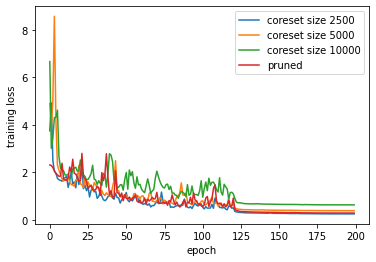

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(200), large_full_craig['train_loss'][0], label='coreset size 2500')
plt.plot(range(200), medium_full_craig['train_loss'][0], label='coreset size 5000')
plt.plot(range(200), small_full_craig['train_loss'][0], label='coreset size 10000')
plt.plot(range(200), large_pruned_full_craig['train_loss'][0], label='pruned')


plt.legend()

plt.xlabel("epoch")
plt.ylabel("training loss")
plt.show()

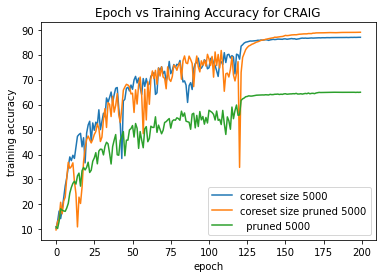

In [41]:
import matplotlib.pyplot as plt

# plt.plot(range(200), large_full_craig['train_acc'][0], label='coreset size 2500')
plt.plot(range(200), medium_full_craig['train_acc'][0], label='coreset size 5000')
# plt.plot(range(200), small_full_craig['train_acc'][0], label='coreset size 10000')
plt.plot(range(200), pruned_full_craig['train_acc'][0], label='coreset size pruned 5000')
plt.plot(range(200), large_pruned_full_craig['train_acc'][0], label='  pruned 5000')



plt.legend()

plt.xlabel("epoch")
plt.ylabel("training accuracy")
plt.title("Epoch vs Training Accuracy for CRAIG")
plt.savefig("three.jpeg")


plt.show()

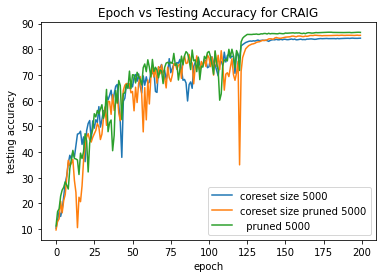

In [35]:
import matplotlib.pyplot as plt

# plt.plot(range(200), large_full_craig['test_acc'][0], label='coreset size 2500')
plt.plot(range(200), medium_full_craig['test_acc'][0], label='coreset size 5000')
# plt.plot(range(200), small_full_craig['test_acc'][0], label='coreset size 10000')
plt.plot(range(200), pruned_full_craig['test_acc'][0], label='coreset size pruned 5000')
plt.plot(range(200), large_pruned_full_craig['test_acc'][0], label='  pruned 5000')



plt.legend()

plt.xlabel("epoch")
plt.ylabel("testing accuracy")
plt.title("Epoch vs Testing Accuracy for CRAIG")
plt.savefig("three.jpeg")


plt.show()

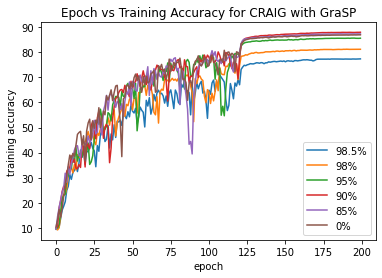

In [93]:
plt.rcParams["figure.figsize"] = (6, 4)



plt.plot(range(200), full_craig985['train_acc'][0], label='98.5%')
plt.plot(range(200), full_craig98['train_acc'][0], label='98%')
plt.plot(range(200), full_craig95['train_acc'][0], label='95%')
plt.plot(range(200), full_craig90['train_acc'][0], label='90%')
plt.plot(range(200), full_craig85['train_acc'][0], label='85%')
plt.plot(range(200), medium_full_craig['train_acc'][0], label='0%')



plt.legend()

plt.xlabel("epoch")
plt.ylabel("training accuracy")
plt.title("Epoch vs Training Accuracy for CRAIG with GraSP")
plt.savefig("three.jpeg")


plt.show()

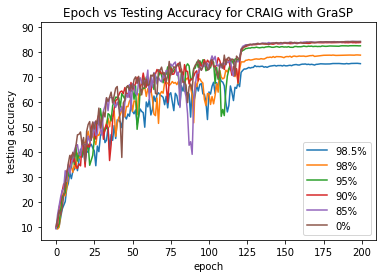

In [94]:
plt.ylim([5, 92])


plt.plot(range(200), full_craig985['test_acc'][0], label='98.5%')
plt.plot(range(200), full_craig98['test_acc'][0], label='98%')
plt.plot(range(200), full_craig95['test_acc'][0], label='95%')
plt.plot(range(200), full_craig90['test_acc'][0], label='90%')
plt.plot(range(200), full_craig85['test_acc'][0], label='85%')
plt.plot(range(200), medium_full_craig['test_acc'][0], label='0%')



plt.legend()

plt.xlabel("epoch")
plt.ylabel("testing accuracy")
plt.title("Epoch vs Testing Accuracy for CRAIG with GraSP")
plt.savefig("three.jpeg")


plt.show()


In [292]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
small_data_convolved = np.convolve(small_full_craig['train_acc'][0], kernel, mode='same')

kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
medium_data_convolved = np.convolve(medium_full_craig['train_acc'][0], kernel, mode='same')

kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
large_data_convolved = np.convolve(large_full_craig['train_acc'][0], kernel, mode='same')

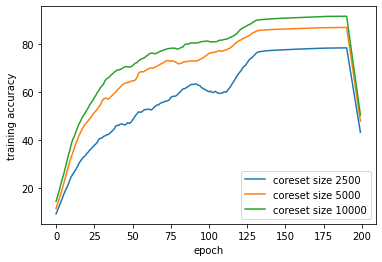

In [296]:
import matplotlib.pyplot as plt

plt.plot(range(200), small_data_convolved, label='coreset size 2500')
plt.plot(range(200), medium_data_convolved, label='coreset size 5000')
plt.plot(range(200), large_data_convolved, label='coreset size 10000')
plt.legend()

plt.xlabel("epoch")
plt.ylabel("training accuracy")
plt.show()

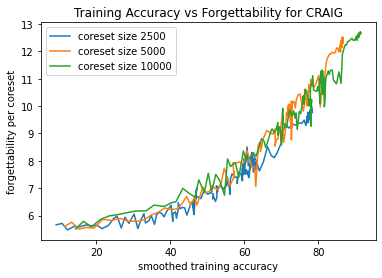

In [319]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.plot( small_data_convolved[:a], average_forgettability_small[:a], label='coreset size 2500')
plt.plot( medium_data_convolved[:a], average_forgettability_medium[:a], label='coreset size 5000')
plt.plot( large_data_convolved[:a], average_forgettability_large[:a], label='coreset size 10000')
plt.legend()

plt.title("Training Accuracy vs Forgettability for CRAIG")


plt.xlabel("smoothed training accuracy")
plt.ylabel("forgettability per coreset")
plt.savefig("four.jpeg")



plt.show()

In [85]:
selection_count = full_craig['times_selected'][0]

In [86]:
selection_count.shape

(50000,)

In [87]:
list(selection_count)

[200.0,
 200.0,
 44.0,
 200.0,
 200.0,
 4.0,
 200.0,
 200.0,
 200.0,
 200.0,
 6.0,
 7.0,
 3.0,
 26.0,
 17.0,
 13.0,
 8.0,
 14.0,
 19.0,
 109.0,
 26.0,
 42.0,
 3.0,
 10.0,
 20.0,
 27.0,
 11.0,
 200.0,
 6.0,
 200.0,
 2.0,
 16.0,
 4.0,
 19.0,
 8.0,
 34.0,
 6.0,
 4.0,
 17.0,
 46.0,
 19.0,
 4.0,
 19.0,
 2.0,
 21.0,
 6.0,
 8.0,
 41.0,
 35.0,
 7.0,
 68.0,
 25.0,
 34.0,
 36.0,
 2.0,
 12.0,
 12.0,
 19.0,
 11.0,
 31.0,
 3.0,
 9.0,
 2.0,
 17.0,
 7.0,
 6.0,
 6.0,
 10.0,
 2.0,
 8.0,
 48.0,
 14.0,
 21.0,
 20.0,
 66.0,
 35.0,
 2.0,
 18.0,
 32.0,
 22.0,
 31.0,
 41.0,
 4.0,
 12.0,
 54.0,
 29.0,
 7.0,
 3.0,
 27.0,
 34.0,
 17.0,
 18.0,
 81.0,
 8.0,
 24.0,
 19.0,
 14.0,
 45.0,
 3.0,
 51.0,
 17.0,
 14.0,
 32.0,
 14.0,
 13.0,
 2.0,
 6.0,
 7.0,
 2.0,
 1.0,
 27.0,
 27.0,
 5.0,
 40.0,
 1.0,
 11.0,
 40.0,
 4.0,
 9.0,
 6.0,
 3.0,
 12.0,
 8.0,
 33.0,
 2.0,
 3.0,
 3.0,
 13.0,
 20.0,
 13.0,
 18.0,
 21.0,
 15.0,
 4.0,
 9.0,
 6.0,
 1.0,
 13.0,
 12.0,
 4.0,
 75.0,
 8.0,
 27.0,
 3.0,
 4.0,
 24.0,
 62.0,
 8.0,
 5.0,
 10

In [89]:
forget_counts_by_index = []
for i in range(50000):
    forget_counts_by_index.append(forget_counts_dict[i])
    

print(len(forget_counts_by_index))

50000


In [91]:
forget_counts_by_index
max(forget_counts_by_index)

34

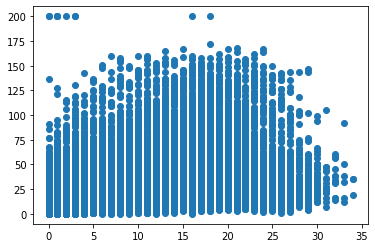

In [92]:
plt.scatter(forget_counts_by_index, selection_count)

In [155]:
times_selected = full_selection_count
times_forgotten = forget_counts_by_index

In [ ]:
#find average forgettabilty for each selection value
#find average selection value for each forgattbablity 

In [156]:
selection_to_forget = []
for i in range(201):
    selection_to_forget.append([])

In [157]:
forget_to_selection = []
for i in range(35):
    forget_to_selection.append([])

In [158]:
for i in range(50000):
    select_count =  times_selected[i]
    forgt_count = times_forgotten[i]
#     selection_to_forget[int(select_count)].append(forgt_count)
    forget_to_selection[int(forgt_count)].append(select_count)

In [159]:
selection_to_forget = forget_to_selection

In [160]:
def list_mean(lst):
    if len(lst) == 0:
        return 0
    else:
        return(np.mean(lst))

In [161]:
def list_std(lst):
    if len(lst) == 0:
        return 0
    else:
        return(np.std(lst))

In [162]:
selection_to_forget_mean = []
for i in selection_to_forget:
    selection_to_forget_mean.append(list_mean(i))

In [163]:
selection_to_forget_std = []
for i in selection_to_forget:
    selection_to_forget_std.append(list_std(i))

In [164]:
selection_to_forget_mean

[8.848737064270152,
 12.898335152838428,
 16.217426306663363,
 19.07186489399928,
 21.023726040205705,
 21.778470254957508,
 24.263287401574804,
 24.791055718475075,
 26.63149078726968,
 27.643438697318008,
 29.30621442125237,
 31.29861821903787,
 33.212332589285715,
 33.68521689497717,
 34.435735887096776,
 37.89772727272727,
 38.07245508982036,
 40.423963133640555,
 40.20904325032765,
 39.55912408759124,
 40.31848306332842,
 40.02104377104377,
 39.182711198428294,
 39.64463840399002,
 40.08228840125392,
 35.783400809716596,
 40.73888888888889,
 35.895833333333336,
 38.56428571428572,
 31.888461538461538,
 33.44078947368421,
 28.06578947368421,
 34.1875,
 33.166666666666664,
 22.916666666666668]

<function matplotlib.pyplot.show(close=None, block=None)>

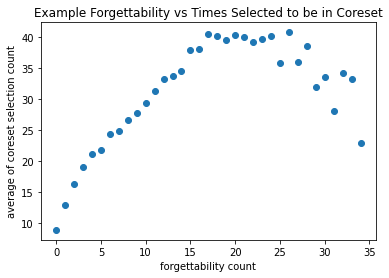

In [315]:
plt.scatter(range(35), selection_to_forget_mean)
plt.xlabel("forgettability count")
plt.ylabel("average of coreset selection count")
plt.title("Example Forgettability vs Times Selected to be in Coreset")
plt.savefig("five.jpeg")
plt.show

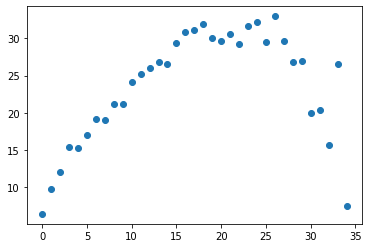

In [120]:
plt.scatter(range(35), selection_to_forget_std)

In [111]:
selection_to_forget_len = []
for i in selection_to_forget:
    selection_to_forget_len.append(len(i))

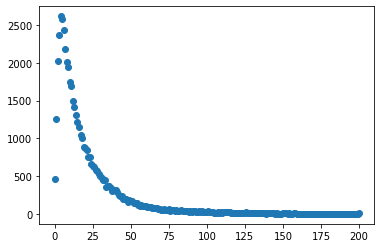

In [112]:
plt.scatter(range(201), selection_to_forget_len)

In [182]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeRegressor()
clf = clf.fit(np.array(times_forgotten[:40000]).reshape(-1,1), times_selected[:40000])

In [183]:
preds = clf.predict(np.array(times_forgotten[:40000]).reshape(-1,1))

In [185]:
from sklearn.metrics import r2_score
r2_score(times_selected[:40000], preds)

0.35428497048613816

In [188]:
preds = clf.predict(np.array(times_forgotten[40000:]).reshape(-1,1))
r2_score(times_selected[40000:], preds)

0.3625371662862368

In [179]:
list(preds)

[8.79926914251721,
 12.894194434902095,
 41.02106227106227,
 8.79926914251721,
 39.9033203125,
 12.894194434902095,
 40.24848178137652,
 16.004746342981637,
 8.79926914251721,
 34.79703282828283,
 24.749770220588236,
 38.31565656565657,
 8.79926914251721,
 12.894194434902095,
 19.15334993209597,
 27.704545454545453,
 8.79926914251721,
 26.685367114788004,
 12.894194434902095,
 8.79926914251721,
 16.004746342981637,
 8.79926914251721,
 40.24848178137652,
 8.79926914251721,
 8.79926914251721,
 8.79926914251721,
 8.79926914251721,
 8.79926914251721,
 24.221185064935064,
 16.004746342981637,
 16.004746342981637,
 12.894194434902095,
 31.071338383838384,
 8.79926914251721,
 20.98305833824396,
 22.058192686357245,
 12.894194434902095,
 8.79926914251721,
 27.704545454545453,
 8.79926914251721,
 8.79926914251721,
 12.894194434902095,
 33.01857142857143,
 8.79926914251721,
 20.98305833824396,
 12.894194434902095,
 24.749770220588236,
 12.894194434902095,
 12.894194434902095,
 20.98305833824396,

In [181]:
list(times_selected[40000:])

[6.75,
 16.5,
 10.75,
 8.0,
 35.5,
 22.0,
 20.25,
 20.75,
 3.5,
 29.25,
 27.5,
 24.5,
 9.25,
 26.5,
 21.0,
 48.25,
 5.75,
 12.75,
 14.0,
 9.25,
 20.75,
 5.75,
 83.25,
 12.25,
 8.5,
 3.25,
 6.25,
 7.25,
 30.75,
 11.5,
 4.75,
 5.75,
 24.25,
 6.25,
 15.75,
 17.5,
 11.25,
 5.5,
 42.25,
 2.5,
 2.5,
 13.75,
 73.5,
 5.0,
 19.0,
 16.5,
 23.0,
 8.0,
 11.75,
 21.75,
 4.25,
 30.25,
 3.75,
 9.25,
 14.75,
 13.0,
 1.75,
 13.5,
 8.0,
 22.25,
 6.0,
 19.25,
 36.25,
 6.25,
 29.75,
 17.75,
 13.0,
 6.75,
 3.0,
 7.75,
 3.25,
 12.75,
 8.5,
 18.5,
 41.25,
 7.25,
 20.75,
 10.0,
 6.25,
 7.5,
 4.25,
 5.75,
 15.75,
 6.0,
 16.25,
 21.0,
 47.75,
 14.75,
 7.75,
 20.0,
 23.5,
 12.5,
 51.5,
 4.5,
 10.5,
 28.25,
 22.75,
 10.5,
 35.0,
 7.25,
 4.75,
 6.25,
 25.0,
 5.75,
 15.75,
 21.75,
 17.25,
 14.25,
 32.25,
 3.25,
 58.0,
 29.25,
 11.0,
 12.0,
 30.75,
 11.0,
 12.5,
 45.25,
 6.75,
 17.25,
 16.5,
 16.25,
 4.75,
 21.75,
 43.0,
 16.5,
 12.25,
 13.25,
 33.0,
 20.25,
 15.75,
 19.25,
 4.25,
 41.75,
 20.5,
 26.5,
 4.0,
 8.75,


In [153]:
full_selection_count = np.zeros(50000)
for a in ['one', 'three', 'four', 'five']:
    full_craig = load('craig_cifar10_' + a + '.npz')
    selection_count = full_craig['times_selected'][0]
    full_selection_count = full_selection_count + selection_count
full_selection_count = full_selection_count/4

In [154]:
full_selection_count

array([200.  , 200.  ,  31.75, ...,  43.75,  13.75,  79.25])

In [168]:
not_selected_indexes = []
for i in range(200):
    if selection_count[i] == 0:
        not_selected_indexes.append(i)
not_selected_indexes

[155]

In [172]:
times_forgotten[155]

0

In [193]:
import pandas as pd
x = pd.Series(times_selected[:40000])
y = pd.Series(times_forgotten[:40000])

In [194]:
x.corr(y)

0.5650195890330796

In [195]:
x.corr(y, method='spearman')

0.6962135409840946

In [196]:
x.corr(y, method='kendall') 

0.521834204147193

In [208]:
grouped = []

for i in times_forgotten:
    grouped.append(i//5)
    
grouped

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 4,
 0,
 0,
 1,
 3,
 0,
 2,
 3,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 4,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 4,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 4,
 1,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 1,


In [209]:
unique, counts = np.unique(grouped, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 30975]
 [    1  6891]
 [    2  4795]
 [    3  4053]
 [    4  2502]
 [    5   706]
 [    6    78]]


In [210]:
len(grouped)

50000

In [217]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.array(times_selected[:40000]).reshape(-1,1), grouped[:40000])

In [218]:
preds = clf.predict(np.array(times_selected[:40000]).reshape(-1,1))

In [219]:
from sklearn.metrics import r2_score, accuracy_score
accuracy_score(grouped[:40000], preds)

0.64915

In [220]:
preds = clf.predict(np.array(times_selected[40000:]).reshape(-1,1))
accuracy_score(grouped[40000:], preds)

0.6376

In [179]:
list(preds)

[8.79926914251721,
 12.894194434902095,
 41.02106227106227,
 8.79926914251721,
 39.9033203125,
 12.894194434902095,
 40.24848178137652,
 16.004746342981637,
 8.79926914251721,
 34.79703282828283,
 24.749770220588236,
 38.31565656565657,
 8.79926914251721,
 12.894194434902095,
 19.15334993209597,
 27.704545454545453,
 8.79926914251721,
 26.685367114788004,
 12.894194434902095,
 8.79926914251721,
 16.004746342981637,
 8.79926914251721,
 40.24848178137652,
 8.79926914251721,
 8.79926914251721,
 8.79926914251721,
 8.79926914251721,
 8.79926914251721,
 24.221185064935064,
 16.004746342981637,
 16.004746342981637,
 12.894194434902095,
 31.071338383838384,
 8.79926914251721,
 20.98305833824396,
 22.058192686357245,
 12.894194434902095,
 8.79926914251721,
 27.704545454545453,
 8.79926914251721,
 8.79926914251721,
 12.894194434902095,
 33.01857142857143,
 8.79926914251721,
 20.98305833824396,
 12.894194434902095,
 24.749770220588236,
 12.894194434902095,
 12.894194434902095,
 20.98305833824396,

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeRegressor()
clf = clf.fit(np.array(times_forgotten[:40000]).reshape(-1,1), times_selected[:40000])

preds = clf.predict(np.array(times_forgotten[:40000]).reshape(-1,1))

from sklearn.metrics import r2_score
r2_score(times_selected[:40000], preds)

preds = clf.predict(np.array(times_forgotten[40000:]).reshape(-1,1))
r2_score(times_selected[40000:], preds)

list(preds)